In [1]:
# demo code for high quality text detection

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\86183\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\86183\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
csv_path = '../../data/telegram/scrape.telegram_forwardsRT30.csv'
df_telegram = pd.read_csv(csv_path)
df_telegram_copy = df_telegram.copy()

df_head_copy = df_telegram_copy.head()
print(df_head_copy)

                            chat      country state city  views  forwards  \
0  https://t.me/helpfulinfoforua  Switzerland   NaN  NaN   7159        42   
1  https://t.me/helpfulinfoforua  Switzerland   NaN  NaN   6026        50   
2  https://t.me/helpfulinfoforua  Switzerland   NaN  NaN   3617        58   
3  https://t.me/helpfulinfoforua  Switzerland   NaN  NaN  10435        76   
4  https://t.me/helpfulinfoforua  Switzerland   NaN  NaN   4374        61   

   replies                                        messageText predicted_class  \
0      124  👋Вітаємо на каналі КОРИСНО (HELPFUL) Швейцарсь...    Volunteering   
1       31  Які пропозиції підтримки є у Вашому кантоні? \...    Volunteering   
2        2  Як оформити самозайнятість в Швейцарії зі стат...     Integration   
3      296  Дорогі учасники групи,\n\nРаді оголосити, що д...    Volunteering   
4        8  🔸Статус захисту S надає право працювати у Швей...    Volunteering   

  messageDate  
0  2022-07-14  
1  2023-05-22  
2 

range1: (31.00, 61.84), count: 1020.0
range2: (61.84, 122.41), count: 707.0
range3: (122.41, 241.35), count: 445.0
range4: (241.35, 474.92), count: 196.0
range5: (474.92, 933.60), count: 127.0
range6: (933.60, 1834.35), count: 65.0
range7: (1834.35, 3603.24), count: 34.0
range8: (3603.24, 7076.98), count: 27.0
range9: (7076.98, 13898.66), count: 10.0
range10: (13898.66, 27295.00), count: 5.0


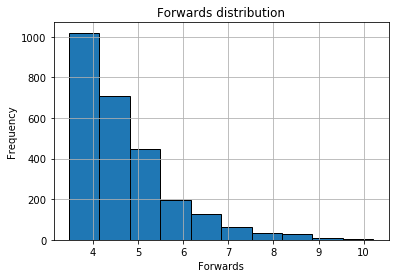

In [15]:
forwards_data = df_telegram_copy['forwards']
forwards_data_log = np.log1p(forwards_data)
counts, bin_edge, _ = plt.hist(forwards_data_log, bins=10, edgecolor='k')
plt.xlabel('Forwards')
plt.ylabel('Frequency')
plt.title('Forwards distribution')
plt.grid(True)

# print range and number
for i in range(len(counts)):
    start = bin_edge[i]
    end = bin_edge[i+1]
    start_ = np.expm1(start)
    end_ = np.expm1(end)
    count = counts[i]
    print(f"range{i+1}: ({start_:.2f}, {end_:.2f}), count: {count}")

plt.show()

Data preprocessing


In [4]:
# stopwords, add ukrainian stopwords from .txt file
stopWords = stopwords.words('english') 
for word in stopwords.words('german'):
    stopWords.append(word)
for word in stopwords.words('french'):
    stopWords.append(word)
for word in stopwords.words('italian'):
    stopWords.append(word)
for word in stopwords.words('russian'):
    stopWords.append(word)
with open("../../data/stopwords/stopwords_ua.txt") as file: #add ukrainian stopwords loaded from .txt file
    ukrstopWords = [line.rstrip() for line in file]
for stopwords in ukrstopWords:
    stopWords.append(stopwords)

In [11]:
print(df_telegram_copy['messageText'][0])

# removing stopwords
def remove_stopwords(text):
    if len(text) > 50:
        new_text = []
        for word in text.split():
            if word in stopWords:
                continue
            else:
                new_text.append(word)
        return ' '.join(new_text)
    else:
        return text

# removing HTML Tags
def remove_html(text):
    if len(text) > 50:
        remove_ = re.compile('<.*?')
        return re.sub(remove_, r'', text)
    else:
        return text

# removing URLs
def remove_url(text):
    if len(text) > 50:
        re_url = re.compile('https?://\S+|www\.\S+')
        return re_url.sub('', text)
    else:
        return text

# removing emojis, from git
def remove_emojis(text):
    if len(text) > 50:
        emoji_pattern = re.compile(pattern="["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U00002702-\U000027B0"  # Dingbats
            u"\U000024C2-\U0001F251"
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text

# lowercasing
def convert_lowercase(text):
    if len(text) > 50:
        text = text.lower()
        return text
    else:
        return text

# removing punctuation
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

# # tokenization 
# def tokenize(text):
#     if len(text) > 50:
#         text = text.replace("\n", " ")
#         text = sent_tokenize(text)
#         return text
#     else:
#         return text

df_telegram_copy['messageText'] = df_telegram_copy['messageText'].apply(remove_stopwords).apply(remove_html).apply(remove_url).apply(remove_emojis).apply(convert_lowercase).apply(remove_punctuation)

print(df_telegram_copy['messageText'][0])

👋Вітаємо на каналі КОРИСНО (HELPFUL) Швейцарського Червоного Хреста.\nМи — група волонтерів, яка допоможе вам знайти відповіді на ваші запитання. Ми намагаємось відповідати впродовж 24 годин. Відповіді на запитання надаються з понеділка по п’ятницю. \n\nПерш ніж поставити своє запитання, просимо вас спочатку переглянути веб-сайт КОРИСНО (HELPFUL): helpful.redcross.ch\n\nНа цьому каналі можна використовувати українську, російську, англійську та державні мови Швейцарії. Ми відповідатимемо здебільшого державними мовами Швейцарії та пропонуватимемо перекласти наші відповіді. Для цього скористайтеся функцією «перекладу», яку пропонує Telegram. Указівки та коментарі наведено нижче.\n\n⚠️Оскільки це публічний канал, ваші коментарі бачитимуть всі бажаючі.\nЯкщо у вас є запитання, що передбачає розкриття особистої інформації, просимо вас додати в коментарі значок ✉️.\nТоді ми надішлемо вам приватне повідомлення в зашифрованому чаті.\n\n📍Відповіді на деякі питання були надані в приватних повідом

Manual marking and split dataset

In [31]:
# manual marking
threshold_quality = 60
df_telegram_copy['label'] = df_telegram_copy['forwards'].apply(lambda x: 1 if x >= threshold_quality else 0)

# split train and validation
X_train, X_val, y_train, y_val = train_test_split(df_telegram_copy['messageText'], df_telegram_copy['label'], test_size=0.2, random_state=24)

Logistic Regression

Validation Accuracy: 0.7311
Validation F1 Score: 0.8189


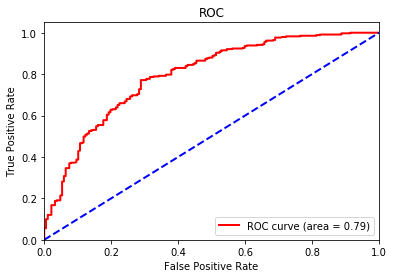

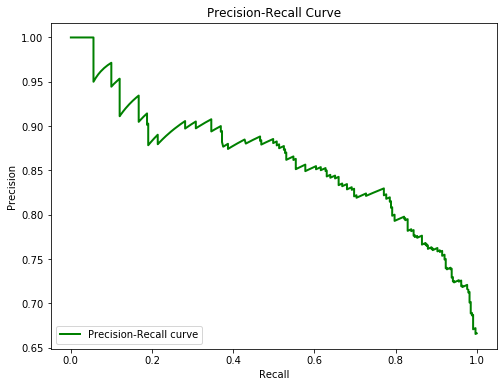

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, precision_recall_curve

def logistic_regression(X_train, y_train, X_val, y_val, max_features=5000):
    # use TF-IDF to vectorize data
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_val_tfidf = tfidf_vectorizer.transform(X_val)

    # train logistic regression model
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train_tfidf, y_train)

    # predict on validation
    val_predictions = logistic_regression.predict(X_val_tfidf)

    # evaluate the model
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_f1 = f1_score(y_val, val_predictions)

    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Validation F1 Score: {val_f1:.4f}")

    # generate the ROC curve
    fpr, tpr, _ = roc_curve(y_val, logistic_regression.predict_proba(X_val_tfidf)[:,1])
    roc_auc = auc(fpr, tpr)

    # plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc='lower right')
    plt.show()

    # generate the precision-recall curve
    precision, recall, _ = precision_recall_curve(y_val, logistic_regression.predict_proba(X_val_tfidf)[:, 1])

    # plot precision-recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()
    
logistic_regression(X_train, y_train, X_val, y_val, max_features=5000)    


Random Forest Classifier

Random Forest Validation Accuracy: 0.7992
Random Forest Validation F1 Score: 0.8548


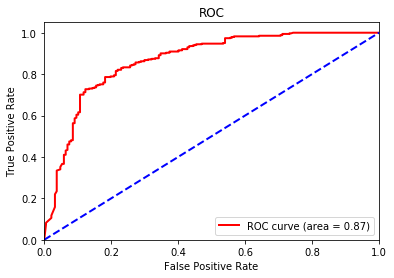

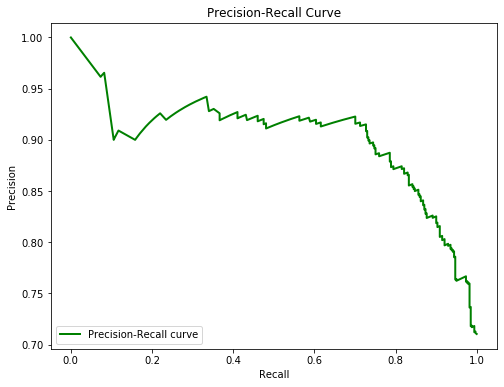

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

def random_forest_classifier(X_train, y_train, X_val, y_val, max_features=5000, n_estimators=100, random_state=24):
    # use TF-IDF to vectorize data
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_val_tfidf = tfidf_vectorizer.transform(X_val)

    # create and train the Random Forest model
    random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    random_forest.fit(X_train_tfidf, y_train)

    # predict on validation
    val_predictions_rf = random_forest.predict(X_val_tfidf)

    # evaluate the model
    val_accuracy_rf = accuracy_score(y_val, val_predictions_rf)
    val_f1_rf = f1_score(y_val, val_predictions_rf)

    print(f"Random Forest Validation Accuracy: {val_accuracy_rf:.4f}")
    print(f"Random Forest Validation F1 Score: {val_f1_rf:.4f}")

    # generate the ROC curve
    fpr, tpr, _ = roc_curve(y_val, random_forest.predict_proba(X_val_tfidf)[:, 1])
    roc_auc = auc(fpr, tpr)

    # plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc='lower right')
    plt.show()

    # generate the precision-recall curve
    precision, recall, _ = precision_recall_curve(y_val, random_forest.predict_proba(X_val_tfidf)[:, 1])

    # plot precision-recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

random_forest_classifier(X_train, y_train, X_val, y_val, max_features=5000, n_estimators=100, random_state=24)

Pretrained Bert Model

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import pandas as pd

# manual label
threshold_quality = 60
df_telegram_copy['label'] = df_telegram_copy['forwards'].apply(lambda x: 1 if x >= threshold_quality else 0)

# split train and validation
X_train, X_val, y_train, y_val = train_test_split(df_telegram_copy['messageText'], df_telegram_copy['label'], test_size=0.2, random_state=24)

# pytorch dataset
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

train_dataset = tokenizer(list(X_train), padding=True, truncation=True, return_tensors="pt", max_length=512)
val_dataset = tokenizer(list(X_val), padding=True, truncation=True, return_tensors="pt", max_length=512)

train_labels = torch.tensor(y_train.values, dtype=torch.long)
val_labels = torch.tensor(y_val.values, dtype=torch.long)

train_data = TensorDataset(train_dataset["input_ids"], train_dataset["attention_mask"], train_labels)
val_data = TensorDataset(val_dataset["input_ids"], val_dataset["attention_mask"], val_labels)

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)

# classification model
class ClassificationModel(nn.Module):
    def __init__(self, num_labels):
        super(ClassificationModel, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=num_labels)

    def forward(self, input_ids, attention_mask):
        output = self.bert(input_ids, attention_mask=attention_mask)
        return output.logits

model = ClassificationModel(num_labels=2)
Loss = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

# train model
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model.to(device)
epochs = 10

def train_model(epochs, train_loader, val_loader):
    training_loss = []
    validating_loss = []
    f1_scores = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for batch in train_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = Loss(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        epoch_loss = running_loss / len(train_loader)
        training_loss.append(epoch_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")

        # eval model
        model.eval()
        val_loss = 0.0
        predictions = []
        targets = []
        
        with torch.no_grad():
            for batch in val_loader:
                input_ids, attention_mask, labels = batch
                input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
                
                outputs = model(input_ids, attention_mask)
                loss = Loss(outputs.logit, labels)
                val_loss += loss.item()
                
                predictions.extend(outputs.cpu().squeeze(1).numpy())
                targets.extend(labels.cpu().numpy())

        val_loss /= len(val_loader)
        validating_loss.append(val_loss)
        print(f"Validation Loss: {val_loss:.4f}")

        # metrics
        predictions = np.array(predictions)
        targets = np.array(targets)
        val_f1 = f1_score(targets, predictions)
        f1_scores.append(val_f1)
        print(f"Validation F1 Score: {val_f1:.4f}")

    return model, training_loss, validating_loss, predictions, f1_scores

def plot_loss(training_loss, validating_loss):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss', marker='o')
    plt.plot(range(1, len(validating_loss) + 1), validating_loss, label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_f1(f1):
    f1 = np.array(f1)
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs + 1), f1, label='Validation F1 Score', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.title('Validation F1 Score Over Epochs')
    plt.grid(True)
    plt.show()
    

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [37]:
# train model
model_bert_32_10, training_loss, validating_loss, predictions, f1_score = train_model(epochs, train_loader, val_loader)

# plot
plot_loss(training_loss, validating_loss)
plot_f1(f1_score)
# torch.save(model_bert_32_10.state_dict(), 'bert_regression_model_01.pth')